# Movie Recommendation Engine

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading Dataset

In [2]:
ratings = pd.read_csv("ratings.csv",sep = "\t", encoding = "latin-1")
ratings

,Unnamed: 0,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,0,1,1193,5,978300760,0,1192
1,1,1,661,3,978302109,0,660
2,2,1,914,3,978301968,0,913
3,3,1,3408,4,978300275,0,3407
4,4,1,2355,5,978824291,0,2354
...,...,...,...,...,...,...,...
256882,256882,1571,1958,4,974737853,1570,1957
256883,256883,1571,21,3,974740133,1570,20
256884,256884,1571,25,3,974738995,1570,24
256885,256885,1571,349,4,974740265,1570,348


# We don't need all this columns. User_id, Moie_id and rating columns matter to us. So we drop all other columns except those three columns

In [3]:
ratings = ratings.drop(["Unnamed: 0","timestamp","user_emb_id","movie_emb_id"],axis = 1)
ratings

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
256882,1571,1958,4
256883,1571,21,3
256884,1571,25,3
256885,1571,349,4


# We got the columns that are useful to us

# Gettings info from the ratings

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256887 entries, 0 to 256886
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   256887 non-null  int64
 1   movie_id  256887 non-null  int64
 2   rating    256887 non-null  int64
dtypes: int64(3)
memory usage: 5.9 MB


# Movie_id column data types and rating column data types are in float form. We need to convert them into integer form for our ease

In [5]:
ratings["movie_id"] = ratings["movie_id"].fillna(0)
ratings["rating"] = ratings["rating"].fillna(0)

In [6]:
ratings["movie_id"] = ratings["movie_id"].astype(int)
ratings["rating"] = ratings["rating"].astype(int)

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256887 entries, 0 to 256886
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   256887 non-null  int64
 1   movie_id  256887 non-null  int64
 2   rating    256887 non-null  int64
dtypes: int64(3)
memory usage: 5.9 MB


# Reading User Dataset

In [8]:
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])


In [9]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [10]:
# Checking for NaN values
users.isnull().values.any()

False

We found no NaN values in the users dataset

In [11]:
#Getting info of the users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


# Now with movies dataset

In [12]:
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [13]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Checking for NaN values
movies.isnull().values.any()

False

No NaN values in Movie dataset

In [15]:
# Getting info from the movie dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


# Data Exploration

Titles. 
We are going to look, what are the frequent words used in movie titles.

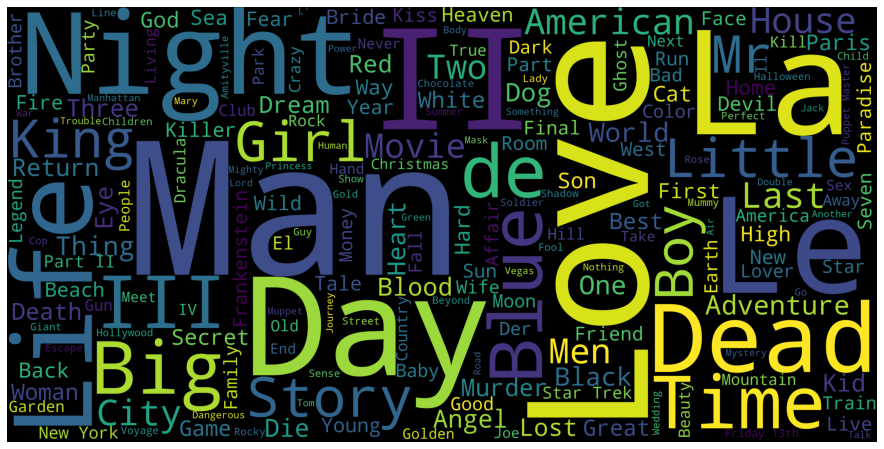

In [16]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Love, Night, Man, Day, Dead, Life are frequently used words.

Ratings.
Now we will ratings how ratings are distributed.

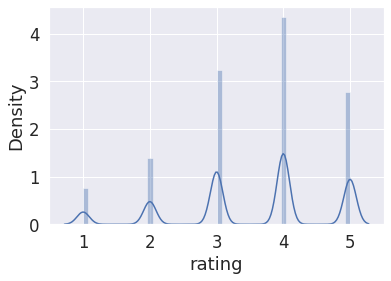

In [17]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'])

More movies got 4 star and five star ratings. I think half of the movies are in four and five star ratings.

# Now what are we going to do is, we merge all theree dataset for our analysis and to build recommendation engines.

In [18]:
data = pd.merge(pd.merge(movies,ratings),users)
data

,movie_id,title,genres,user_id,rating,gender,zipcode,age_desc,occ_desc
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,48067,Under 18,K-12 student
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,48067,Under 18,K-12 student
2,150,Apollo 13 (1995),Drama,1,5,F,48067,Under 18,K-12 student
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,48067,Under 18,K-12 student
4,527,Schindler's List (1993),Drama|War,1,5,F,48067,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...
256882,3536,Keeping the Faith (2000),Comedy|Romance,768,4,M,17067,25-34,programmer
256883,3624,Shanghai Noon (2000),Action,768,5,M,17067,25-34,programmer
256884,3755,"Perfect Storm, The (2000)",Action|Adventure|Thriller,768,3,M,17067,25-34,programmer
256885,3896,"Way of the Gun, The (2000)",Crime|Thriller,768,5,M,17067,25-34,programmer


Now we are going to use only title, genres and rating and we will drop all the columns.

In [19]:
data = data.drop(["movie_id","user_id","gender","zipcode","age_desc","occ_desc"],axis = 1)
data

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
1,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,Apollo 13 (1995),Drama,5
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,Schindler's List (1993),Drama|War,5
...,...,...,...
256882,Keeping the Faith (2000),Comedy|Romance,4
256883,Shanghai Noon (2000),Action,5
256884,"Perfect Storm, The (2000)",Action|Adventure|Thriller,3
256885,"Way of the Gun, The (2000)",Crime|Thriller,5


In [20]:
data.head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
1,Pocahontas (1995),Animation|Children's|Musical|Romance,5
2,Apollo 13 (1995),Drama,5
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4
4,Schindler's List (1993),Drama|War,5
5,"Secret Garden, The (1993)",Children's|Drama,4
6,Aladdin (1992),Animation|Children's|Comedy|Musical,4
7,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,4
8,Beauty and the Beast (1991),Animation|Children's|Musical,5
9,Fargo (1996),Crime|Drama|Thriller,4


In [21]:
data.tail()

,title,genres,rating
256882,Keeping the Faith (2000),Comedy|Romance,4
256883,Shanghai Noon (2000),Action,5
256884,"Perfect Storm, The (2000)",Action|Adventure|Thriller,3
256885,"Way of the Gun, The (2000)",Crime|Thriller,5
256886,Best in Show (2000),Comedy,3


In [22]:
data.iloc[40:60,:]

,title,genres,rating
40,"Bug's Life, A (1998)",Animation|Children's|Comedy,5
41,Miracle on 34th Street (1947),Drama,4
42,Tarzan (1999),Animation|Children's,3
43,Run Lola Run (Lola rennt) (1998),Action|Crime|Romance,4
44,"Sixth Sense, The (1999)",Thriller,4
45,Airplane! (1980),Comedy,4
46,Big (1988),Comedy|Fantasy,4
47,"Christmas Story, A (1983)",Comedy|Drama,5
48,Ferris Bueller's Day Off (1986),Comedy,4
49,Awakenings (1990),Drama,5


#Genres


We are going to look what are the top genres.

In [23]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

Drama at the top, followed by comedy, action, thriller at last Romance are the top 5 genres.

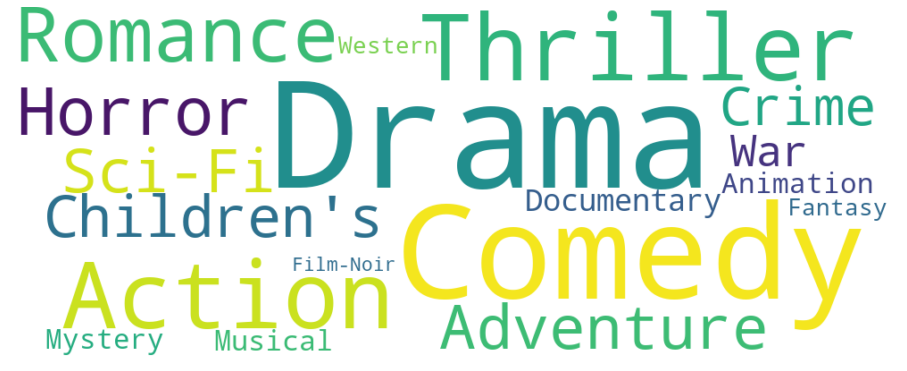

In [24]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Above word cloud is for to show what are the genres.

# We can go on with the Data analysis, but for now we will start building the Movie recommendation Engine.

# Content Based Recommendation Engine

In [25]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [27]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [28]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [29]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [30]:
genre_recommendations('Pulp Fiction (1994)').head(20)

280                New Jersey Drive (1995)
287              Once Were Warriors (1994)
293                    Pulp Fiction (1994)
387                   Jason's Lyric (1994)
427                   Carlito's Way (1993)
839                           Cyclo (1995)
863     Killer: A Journal of Murder (1995)
948            Angel on My Shoulder (1946)
950         They Made Me a Criminal (1939)
1039                    Normal Life (1996)
1047                       Sleepers (1996)
1068               Bonnie and Clyde (1967)
1195                     GoodFellas (1990)
1381       Night Falls on Manhattan (1997)
1439                  Donnie Brasco (1997)
1680                   Jackie Brown (1997)
1710       Letter From Death Row, A (1998)
1731                       Twilight (1998)
1739                  Suicide Kings (1997)
1741               Newton Boys, The (1998)
Name: title, dtype: object

In [31]:
genre_recommendations('American Psycho (2000)').head(20)

3466                          American Psycho (2000)
3760                       Psycho Beach Party (2000)
308                             Relative Fear (1994)
403                   In the Mouth of Madness (1995)
732                                   Thinner (1996)
879     Halloween: The Curse of Michael Myers (1995)
1201                                   Psycho (1960)
1312                           Believers, The (1987)
1334                               Nightwatch (1997)
1384                                   Scream (1996)
1668                                 Scream 2 (1997)
1822                                Ugly, The (1997)
1925                              Poltergeist (1982)
1926           Poltergeist II: The Other Side (1986)
1927                          Poltergeist III (1988)
1957                      Disturbing Behavior (1998)
2038                           Halloween: H20 (1998)
2044                          Graveyard Shift (1990)
2049                           Dead Zone, The 